In [138]:
import numpy as np
import pandas as pd

In [139]:
df_real=pd.read_csv('/content/drive/MyDrive/train.csv',nrows=100000)
df_real['set']=False
df_real.head()
print(len(df_real))

100000


In [122]:
from sklearn.metrics import accuracy_score

def all_measures(df,thresh=0.5):
  # qid1=np.array(df['qid1'],dtype=list)
  # qid2=np.array(df['qid2'],dtype=list)
  # qids=[]
  # tp,tn,fp,fn=0,0,0,0
  # for i in range(len(qid1)):
  #   qid1[i]=qid1[i][1:-1]
  #   qid2[i]=qid2[i][1:-1]
  #   if len(qid1[i])>0:
  #     qid1[i]=qid1[i].replace(","," ")
  #     qid2[i]=qid2[i].replace(","," ")
  #     qid1[i]=qid1[i].split()
  #     qid2[i]=qid2[i].split()  
  #     qid1[i] = [int(a) for a in qid1[i]]
  #     qid2[i] = [int(a) for a in qid2[i]]
  qids=[]
  for i in range(len(df['qid1'])):
       qids.append([qid1[i],qid2[i]])

  print(len(qids))

  for j in range(len(qids)):
    arr=qids[j]
    print(j)
    for i in range(len(df_real)):
      if df_real['qid1'][i]==arr[0] and df_real['qid2'][i]==arr[1]:
        if df_real['is_duplicate'][i]==1:
          tp+=1
          df_real['set'][i]=True
  for i in range(len(df_real)):
      if df_real['is_duplicate'][i]==1 and df_real['set'][i]==False:
        fn+=1
  tn=50000*99999-len(qids)-fn
  fp=len(qids)-tp
  return tp,tn,fp,fn




In [ ]:
df=pd.read_csv('/content/band1.csv')

tp,tn,fp,fn=all_measures(df)

In [134]:
print(tp,tn,fp,fn)
acc=(tp+tn)/(tp+tn+fp+fn)
precision=(tp)/(tp*2+fp)
recall=(tp)/(tp+fn)
F1=2*precision*recall/(precision+recall)
print("Accuracy:",acc)
print("Precision:",precision)
print("Recall:", recall)
print("F1-score:",F1)

612 24989028000 10750 32100
Accuracy: 0.9997855571114223
Precision: 0.02767727930535456
Recall: 0.030797101449275364
F1-score: 0.02915396341463415


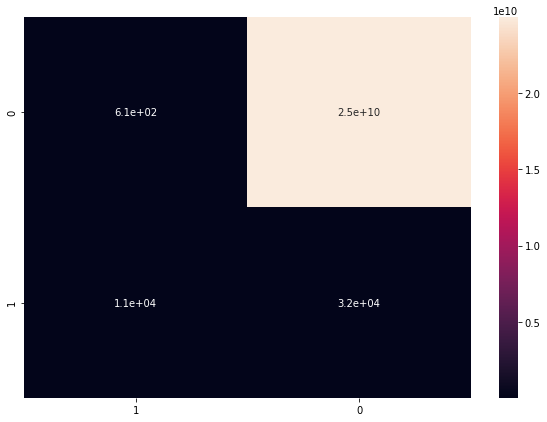

In [137]:


import seaborn as sn
import matplotlib.pyplot as plt
data=[[tp,tn],[fp,fn]]
df_cm = pd.DataFrame(data, index = [i for i in "01"],
                  columns = [i for i in "10"])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)